In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import create_sse_data
from bo_functions import gen_y_Theta_GP
from bo_functions import bo_iter
from bo_functions import calc_y_exp
from bo_plotters import plot_xy

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 85

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 25
train_iter = 300
noise_std = 0.1
restarts = 15

emulator = True
sparse_grid = False
verbose = False

shuffle_seed = 6
t=4

# explore_bias = torch.tensor([0,0.1,0.5])
explore_bias = torch.tensor([0.5])

#Pull Experimental data from CSV
exp_data_doc = 'CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
# Theta1 =  np.linspace(-2,2,p) #1x10
# Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

In [3]:
#Create training and test data
##Objective function = SSE
##USING SCIPY METHOD
##Uses 20 LHS Training points

from bo_functions import create_y_data
emulator = True
sparse_grid = True
save_fig=False
obj = "LN_obj"
restarts = None

T1_min = np.min(Theta1)
T2_min = np.min(Theta2)
T1_max = np.max(Theta1)
T2_max = np.max(Theta2)
#Set 20 Point Training data, Model, and Likelihood
#Pull training data from CSV
#Separate training and testing data, uses default of an 80%/20% split
all_data_doc = "CSVs/Train_Data/all_3_data/t=25.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
# train_data, test_data = test_train_split(all_data, shuffle_seed=shuffle_seed)
train_p = []
for i in range(len(Xexp)):
    train_p.append([T1_min,T2_min,Xexp[i]])
    train_p.append([T1_min,T2_max,Xexp[i]])
    train_p.append([T1_max,T2_min,Xexp[i]])
    train_p.append([T1_max,T2_max,Xexp[i]])
train_p = torch.tensor(train_p)
train_y = create_y_data(train_p)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_p, train_y, likelihood)



In [4]:
for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    BO_Results = bo_iter(BO_iters,train_p,train_y,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, Yexp, noise_std, 
                         obj, restarts, sparse_grid, emulator, verbose = verbose,save_fig=save_fig)
    if verbose == True:
        print("Exploration Parameter:",explore_bias[i] )
        print("Best_GP_Theta \n",BO_Results[0])
        print("\n Optimal_GP_Theta \n",BO_Results[1])
        print("\n Total SSE \n", BO_Results[2], "\n")

Explore Bias: tensor(0.5000)


/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


-1.0


IndexError: index 2 is out of bounds for axis 1 with size 2

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


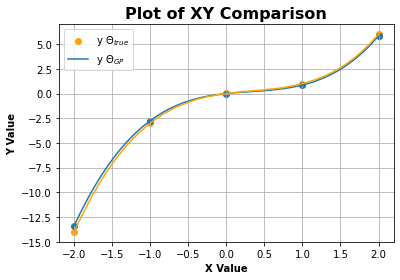

Magnitude of SSE given Theta_Opt =  [ 0.80327433 -0.94294494] is 4.8790e-01


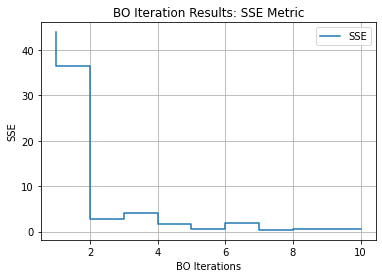

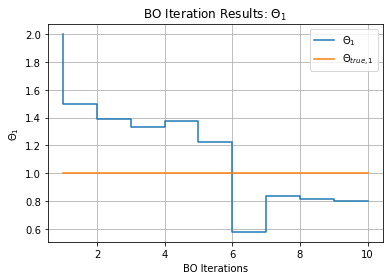

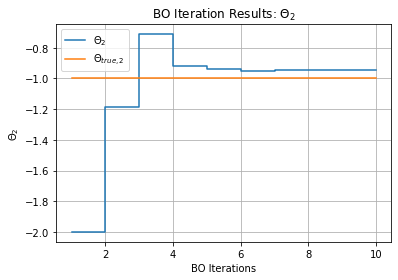

Exploration Parameter: tensor(0.)
Best_GP_Theta 
 [[ 1.35705893 -2.        ]
 [ 1.43830998 -1.50075753]
 [ 1.37376255 -0.99662988]
 [ 1.30862275 -0.58459661]
 [ 1.87421694 -0.80811367]
 [ 0.8164851  -0.9511812 ]
 [ 0.41909343 -0.95553054]
 [ 0.81640527 -0.94746779]
 [ 0.80008986 -0.9424097 ]
 [ 0.79431789 -0.94040423]]

 Optimal_GP_Theta 
 [[ 1.99972259 -2.        ]
 [ 1.50126644 -2.        ]
 [ 1.38857793 -1.18809871]
 [ 1.33440209 -0.7120417 ]
 [ 1.37874181 -0.92108182]
 [ 1.2225153  -0.94155522]
 [ 0.57816444 -0.95255252]
 [ 0.83722607 -0.94804328]
 [ 0.81256264 -0.9449244 ]
 [ 0.80327433 -0.94294494]]

 Total SSE 
 [43.88746115 36.34609274  2.71735982  4.04372468  1.71019523  0.65192244
  1.817111    0.34985096  0.44533504  0.48790325] 



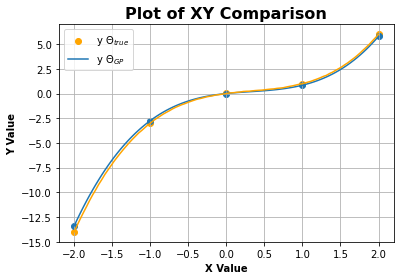

Magnitude of SSE given Theta_Opt =  [ 0.79456835 -0.94997122] is 4.9470e-01


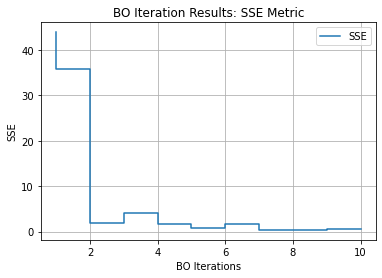

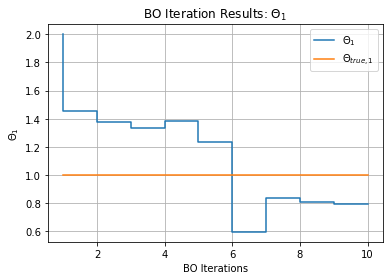

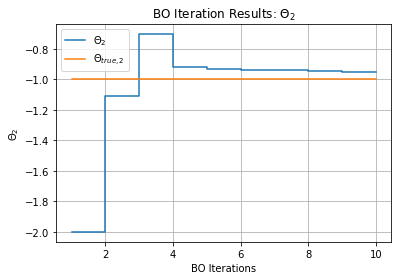

Exploration Parameter: tensor(0.1000)
Best_GP_Theta 
 [[ 1.28047132 -2.        ]
 [ 1.41272414 -1.42781021]
 [ 1.36170918 -0.92080648]
 [ 1.30133573 -0.55721947]
 [ 1.89475669 -0.80174357]
 [ 0.79622825 -0.94116402]
 [ 0.40719549 -0.93667502]
 [ 0.81003783 -0.94928118]
 [ 0.7902766  -0.95188277]
 [ 0.78408207 -0.95546056]]

 Optimal_GP_Theta 
 [[ 1.99972259 -2.        ]
 [ 1.45555904 -2.        ]
 [ 1.37659575 -1.1104026 ]
 [ 1.33439741 -0.70499407]
 [ 1.38489768 -0.91852975]
 [ 1.23609363 -0.93560267]
 [ 0.5957939  -0.93868826]
 [ 0.83484577 -0.94173192]
 [ 0.80584157 -0.94592436]
 [ 0.79456835 -0.94997122]]

 Total SSE 
 [43.88746115 35.90328783  1.85336078  4.18498413  1.77243692  0.74203187
  1.72801075  0.38245926  0.46624052  0.49469546] 



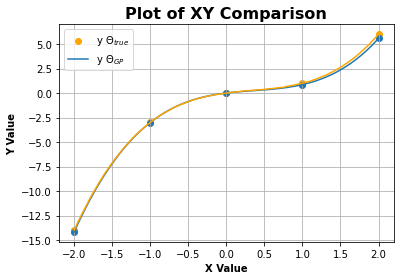

Magnitude of SSE given Theta_Opt =  [ 0.93543685 -1.07436693] is 2.0586e-01


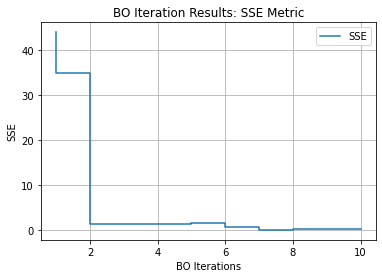

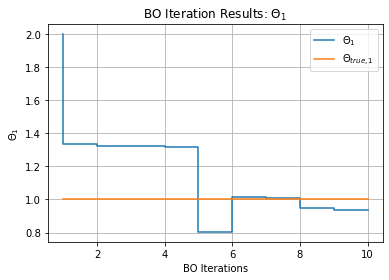

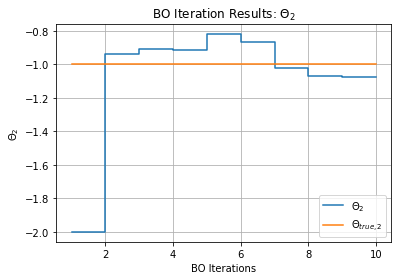

Exploration Parameter: tensor(0.5000)
Best_GP_Theta 
 [[ 1.06200699 -2.        ]
 [ 1.34104076 -1.2391389 ]
 [ 1.30051624 -0.71024703]
 [ 1.58114883 -0.84218682]
 [ 1.0370173  -0.87427293]
 [ 0.48105936 -0.74727273]
 [ 0.94736842 -0.31578947]
 [ 0.94736842 -1.15789474]
 [ 0.73684211 -1.15789474]
 [ 0.94736302 -1.15788133]]

 Optimal_GP_Theta 
 [[ 1.99972259 -2.        ]
 [ 1.33606133 -2.        ]
 [ 1.32493792 -0.93553611]
 [ 1.32337105 -0.90897443]
 [ 1.31969134 -0.91608589]
 [ 0.8036702  -0.81933524]
 [ 1.01398479 -0.86686811]
 [ 1.00980748 -1.02367756]
 [ 0.94854622 -1.06894199]
 [ 0.93543685 -1.07436693]]

 Total SSE 
 [4.38874612e+01 3.49430322e+01 1.25140549e+00 1.38751924e+00
 1.31950150e+00 1.51356166e+00 6.37273139e-01 1.65810363e-02
 1.67022183e-01 2.05863901e-01] 



In [3]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 4 set points
obj = "LN_obj"
save_fig = False

T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
# train_T = torch.tensor(np.array([[0.5,-1.5],[0.5,-0.5],[1.5,-1.5],[1.5,-0.5]]))
train_ln_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results = bo_iter(BO_iters, train_T, train_ln_sse, p,q, m, 
                          theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose)
    print("Exploration Parameter:",explore_bias[i] )
    print("Best_GP_Theta \n",BO_Results[0])
    print("\n Optimal_GP_Theta \n",BO_Results[1])
    print("\n Total SSE \n", BO_Results[2], "\n")

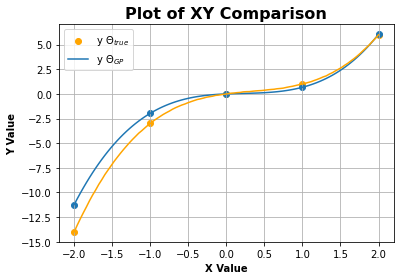

Magnitude of SSE given Theta_Opt =  [ 0.32084553 -0.64719871] is 8.8442e+00


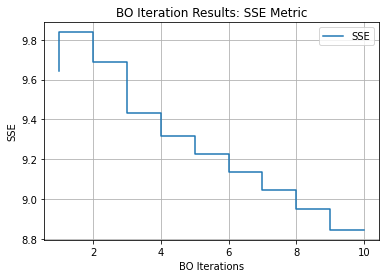

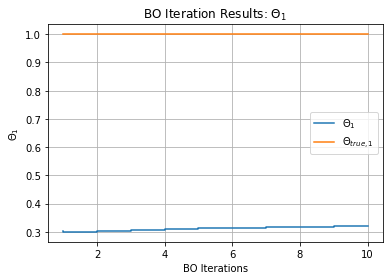

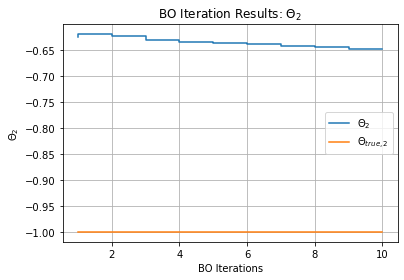

Exploration Parameter: tensor(0.)
Best_GP_Theta 
 [[ 0.30454572 -0.62421284]
 [ 0.29854751 -0.61759505]
 [ 0.30306353 -0.62361903]
 [ 0.30941173 -0.63206056]
 [ 0.31220828 -0.63578744]
 [ 0.31436174 -0.6386447 ]
 [ 0.31639416 -0.64133074]
 [ 0.31850822 -0.64411897]
 [ 0.32085863 -0.64721901]
 [ 0.32366499 -0.65090359]]

 Optimal_GP_Theta 
 [[ 0.30454562 -0.62421368]
 [ 0.29987728 -0.61909961]
 [ 0.30285987 -0.62324496]
 [ 0.30820096 -0.63042278]
 [ 0.31059169 -0.63362691]
 [ 0.31260253 -0.63630689]
 [ 0.3145     -0.63882543]
 [ 0.31642235 -0.64136829]
 [ 0.31849041 -0.64409641]
 [ 0.32084553 -0.64719871]]

 Total SSE 
 [9.64091855 9.83824442 9.68919876 9.43188228 9.31824424 9.22366693
 9.13520028 9.04630126 8.95142007 8.84419837] 



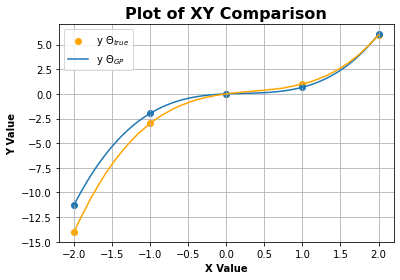

Magnitude of SSE given Theta_Opt =  [ 0.3219189  -0.64859353] is 8.7960e+00


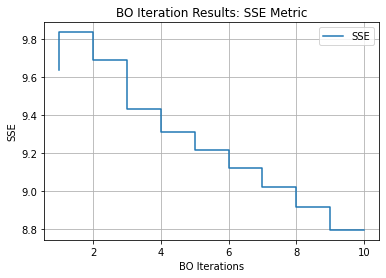

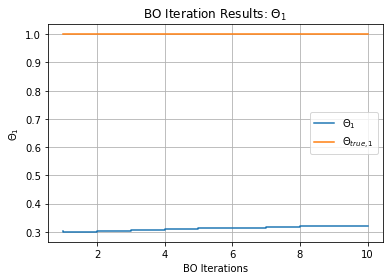

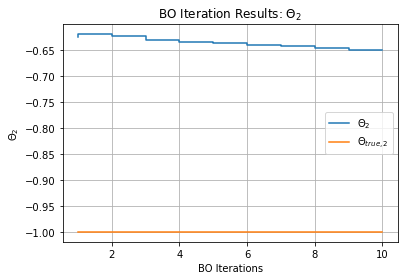

Exploration Parameter: tensor(0.1000)
Best_GP_Theta 
 [[ 0.30454568 -0.62421284]
 [ 0.29838704 -0.61742971]
 [ 0.30309584 -0.62367866]
 [ 0.30962241 -0.63234411]
 [ 0.31257221 -0.63626483]
 [ 0.31487881 -0.63931975]
 [ 0.31709789 -0.64224882]
 [ 0.31946449 -0.64536597]
 [ 0.32218847 -0.64894882]
 [ 0.32556609 -0.65339192]]

 Optimal_GP_Theta 
 [[ 0.30454562 -0.62421368]
 [ 0.29987728 -0.6190996 ]
 [ 0.30284665 -0.62323088]
 [ 0.30820382 -0.63043029]
 [ 0.31066609 -0.63372605]
 [ 0.31277935 -0.63653746]
 [ 0.31480717 -0.63922406]
 [ 0.31690054 -0.64198828]
 [ 0.31920642 -0.64502555]
 [ 0.3219189  -0.64859353]]

 Total SSE 
 [9.64091855 9.83824469 9.68974546 9.43165255 9.31473507 9.21550451
 9.1211512  9.02457563 8.91908319 8.79604545] 



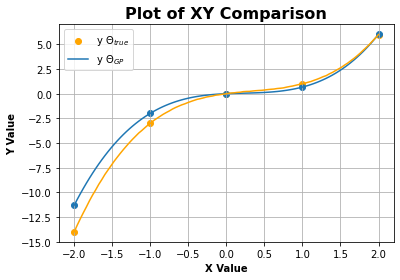

Magnitude of SSE given Theta_Opt =  [ 0.33107797 -0.66000402] is 8.4029e+00


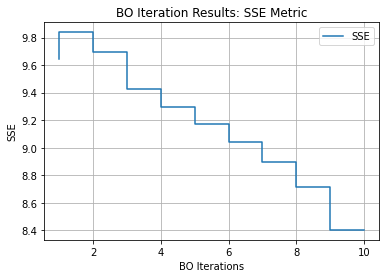

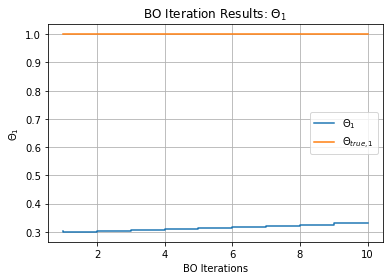

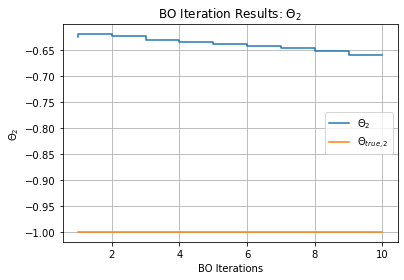

Exploration Parameter: tensor(0.5000)
Best_GP_Theta 
 [[ 0.30454568 -0.62421288]
 [ 0.29774218 -0.61669727]
 [ 0.30349515 -0.62397052]
 [ 0.31070786 -0.63377211]
 [ 0.31467103 -0.63878419]
 [ 0.31765562 -0.64310804]
 [ 0.32086601 -0.64704607]
 [ 0.32589238 -0.65289088]
 [ 0.33399627 -0.66250259]
 [ 0.31578947 -0.73684211]]

 Optimal_GP_Theta 
 [[ 0.30454562 -0.62421368]
 [ 0.29987727 -0.61909962]
 [ 0.30279856 -0.62317355]
 [ 0.30826322 -0.63048452]
 [ 0.31108466 -0.63425471]
 [ 0.31380114 -0.63782145]
 [ 0.31659789 -0.64154594]
 [ 0.31968416 -0.64559121]
 [ 0.32391382 -0.65099295]
 [ 0.33107797 -0.66000402]]

 Total SSE 
 [9.64091855 9.83824434 9.69189238 9.42946293 9.29573862 9.16962332
 9.03955098 8.89886614 8.71158418 8.40293987] 



In [4]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 Set Training points
save_fig = False
obj = "obj"

#Set 4 Point Training data, Model, and Likelihood
T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
# train_T = torch.tensor(np.array([[0.5,-1.5],[0.5,-0.5],[1.5,-1.5],[1.5,-0.5]]))
train_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, m, 
                          theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose, emulator)
    print("Exploration Parameter:",explore_bias[i] )
    print("Best_GP_Theta \n",BO_Results[0])
    print("\n Optimal_GP_Theta \n",BO_Results[1])
    print("\n Total SSE \n", BO_Results[2], "\n")